<a href="https://colab.research.google.com/github/Sjoerd-de-Witte/Machine-Learning-2023/blob/main/1_4_Polynomial_Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown -O /tmp/ml.py 174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
%run /tmp/ml.py

Downloading...
From: https://drive.google.com/uc?id=174lBNvDBJSVWs3OpNL3a68cnhWIcWYuY
To: /tmp/ml.py
100% 1.31k/1.31k [00:00<00:00, 4.90MB/s]


# Polynomial & Multivariate Regression

We have seen that for a single input feature, we can fit a polynomial function of the form:

$$y = a \cdot x + b \cdot x^2 + c \cdot x^3 + .... + z$$

In the case of multivariate models, we can also add mixtures, e.g. for a second-degree polynomial over two features:

$$ y = a \cdot x_1 + b \cdot x_2 + c \cdot x_1^2 + d \cdot x_1 \cdot x_2 + e \cdot x_2^2 + f $$

The two can simply be combined.

In [2]:
from pipetorch import DFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Data

In [5]:
# load the boston housing dataset
df = DFrame.read_from_kaggle('fedesoriano/the-boston-houseprice-data')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [7]:
# select the features RM, LSTAT and the target variable PRICE
df = df[['RM', 'LSTAT', 'MEDV']]

In [8]:
# generate polynomial features of degree=2
p = df.polynomials(degree=2)

So we now see that the columns contain from left to right: $RM$, $LSTAT$, $RM^2$, $RM \cdot LSTAT$, $LSTAT^2$.

In [10]:
# show the generated train_X table
p.train_X[:5]

array([[ 6.575   ,  4.98    , 43.230625, 32.7435  , 24.8004  ],
       [ 6.421   ,  9.14    , 41.229241, 58.68794 , 83.5396  ],
       [ 7.185   ,  4.03    , 51.624225, 28.95555 , 16.2409  ],
       [ 6.998   ,  2.94    , 48.972004, 20.57412 ,  8.6436  ],
       [ 7.147   ,  5.33    , 51.079609, 38.09351 , 28.4089  ]])

# Model

In [11]:
# instantiate a Linear Regression model
model = LinearRegression()

# Train

In [12]:
# fit the model on the training set
model.fit(p.train_X, p.train_y);

# Evaluate

In [13]:
# Compute the difference between the y and the predicted values
difference = model.predict(p.train_X) - p.train_y


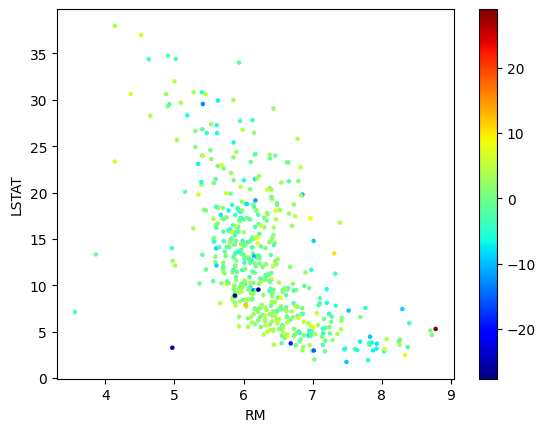

In [14]:
# Create a colored scatter2d plot with the difference as the color
df.train.scatter2d_color(c = difference, s=5)

In [15]:
# Compute the models root mean squared error
sqrt(mean_squared_error(p.train_y, model.predict(p.train_X)))

4.526754799756091

In [16]:
# What is you intuition about using polynomials? Did the model improve?
#Ja

In [ ]:
halt_notebook()